### Обнаружение статистически значимых отличий в уровнях экспрессии генов больных раком
Это задание поможет вам лучше разобраться в методах множественной проверки гипотез и позволит применить ваши знания на данных из реального биологического исследования.

Основные цели задания:
- Вспомните, что такое t-критерий Стьюдента и для чего он применяется
- Сможете применить технику множественной проверки гипотез и увидеть собственными глазами, как она работает на реальных данных
- Почувствуете разницу в результатах применения различных методов поправки на множественную проверку

### Описание используемых данных
Данные для этой задачи взяты из исследования, проведенного в Stanford School of Medicine. В исследовании была предпринята попытка выявить набор  генов, которые позволили  бы более точно диагностировать возникновение рака груди на самых ранних стадиях.

В эксперименте принимали участие 24 человек, у которых не было рака груди (normal), 25 человек, у которых это заболевание было диагностировано на ранней стадии (early neoplasia), и 23 человека с сильно выраженными симптомами (cancer).

Ученые провели секвенирование биологического материала испытуемых, чтобы понять, какие из этих генов наиболее активны в клетках больных людей. 

Секвенирование — это определение степени активности генов в анализируемом образце с помощью подсчёта количества соответствующей каждому гену РНК. В данных для этого задания вы найдете именно эту количественную меру активности каждого из 15748 генов у каждого из 72 человек, принимавших участие в эксперименте.

Вам нужно будет определить те гены, активность которых у людей в разных стадиях заболевания отличается статистически значимо.

Кроме того, вам нужно будет оценить не только статистическую, но и практическую значимость этих результатов, которая часто используется в подобных исследованиях.

Диагноз человека содержится в столбце под названием "Diagnosis".

### Практическая значимость изменения
Цель исследований — найти гены, средняя экспрессия которых отличается не только статистически значимо, но и достаточно сильно. В экспрессионных исследованиях для этого часто используется метрика, которая называется fold change (кратность изменения). Определяется она следующим образом:
- F(C, T) = T/C if T > C
- F(C, T) = C/T if T < C

C,T — средние значения экспрессии гена в control и treatment группах соответственно. По сути, fold change показывает, во сколько раз отличаются средние двух выборок.

### Инструкции к решению задачи
Задание состоит из трёх частей. Если не сказано обратное, то уровень значимости нужно принять равным 0.05.

### Часть 1: применение t-критерия Стьюдента
В первой части вам нужно будет применить критерий Стьюдента для проверки гипотезы о равенстве средних в двух независимых выборках. Применить критерий для каждого гена нужно будет дважды:

- для групп normal (control) и early neoplasia (treatment)
- для групп early neoplasia (control) и cancer (treatment)

В качестве ответа в этой части задания необходимо указать количество статистически значимых отличий, которые вы нашли с помощью t-критерия Стьюдента, то есть число генов, у которых p-value этого теста оказался меньше, чем уровень значимости. 

In [1]:
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.sandbox.stats.multicomp import multipletests
from scipy import stats

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
cd C:\Users\vlad\Machine_Learning\Yandex Specialization\4. Statistics for Data Analysis\week 4\data

C:\Users\vlad\Machine_Learning\Yandex Specialization\4. Statistics for Data Analysis\week 4\data


In [3]:
data = pd.read_csv('gene_high_throughput_sequencing.csv')
data

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,STT5750_Breast_021_DCIS,cancer,1.466240,3.689955,21.331981,19.359546,23.505609,11.576176,11.325851,80.572057,...,2.807635,1.466240,2.807635,1.466240,2.807635,3.689955,18.449777,1.466240,1.466240,1.466240
68,STT5751_Breast_021_IDC,cancer,2.492410,12.279444,30.087759,17.703926,26.064890,10.707081,11.520120,65.041865,...,2.492410,2.492410,1.301619,3.275668,1.301619,1.301619,8.601194,1.301619,1.301619,1.301619
69,STT5758_Breast_022_IDC,cancer,3.530477,20.006038,53.924651,25.449565,30.949995,16.794696,17.121366,70.958462,...,1.176826,1.176826,1.176826,2.961613,1.176826,1.176826,10.764365,1.176826,1.176826,1.176826
70,STT5763_Breast_022_IDC,cancer,3.733734,8.860505,32.538666,21.585069,24.987992,11.460224,11.201202,67.767125,...,2.840946,1.483635,1.483635,1.483635,1.483635,1.483635,8.522837,1.483635,1.483635,1.483635


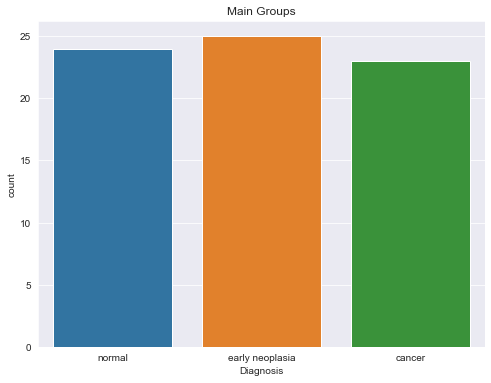

In [4]:
# Визуализируем класыы
plt.figure(figsize=(8,6))
plt.title('Main Groups')
sns.countplot(data['Diagnosis']);

In [5]:
# Поделим данные на группы 
group_normal = data[data['Diagnosis'] == 'normal']
group_early = data[data['Diagnosis'] == 'early neoplasia']
group_cancer = data[data['Diagnosis'] == 'cancer']

Наша задача сравнит группы. Основных групп 2: **control и treatment**. Данные группы мы применяем к:
- normal (control) и early neoplasia (treatment)
- early neoplasia (control) и cancer (treatment)

Для применения двухвыборочного критерия Стьюдента необходимо убедиться, что распределение в выборках не отличается существенно от нормального, для данной проверки используем критерий Шапиро-Уилка.

In [6]:
def apply_shapiro_test(df):
    shapiro_res = df.iloc[:, 2:].apply(stats.shapiro)
    p_values = shapiro_res.iloc[1]
    multitest_res = multipletests(p_values, method='fdr_bh')
    return multitest_res[1].mean()


print('Mean corrected p-value for "group normal": %.4f' % apply_shapiro_test(group_normal))
print('Mean corrected p-value for "group early neoplasia": %.4f' % apply_shapiro_test(group_early))
print('Mean corrected p-value for "group cancer": %.4f' % apply_shapiro_test(group_cancer))

Mean corrected p-value for "group normal": 0.4892
Mean corrected p-value for "group early neoplasia": 0.5025
Mean corrected p-value for "group cancer": 0.4594


Отлчино, в среднем нулевая гипотеза о нормальности не отвергается, можим продолжить применять критерий Стьюдента

In [7]:
def apply_t_test(sample_1, sample_2, equal_var=False, returning_p_values='all'):
    t_test_res = stats.ttest_ind(sample_1.iloc[:, 2:], sample_2.iloc[:, 2:], equal_var=equal_var)
    p_values = t_test_res[1]
    if returning_p_values == 'all':
        return p_values
    elif returning_p_values == 'only significant':
        return p_values[np.where(p_values <= 0.05)]
    else:
        raise ValueError('Parameter p_values can be either all or only significant!!!')

normal_vs_early = apply_t_test(group_normal, group_early, returning_p_values='only significant').shape[0]
early_vs_cancer = apply_t_test(group_early, group_cancer, returning_p_values='only significant').shape[0]
    
print('Normal vs Early Neoplasia (Number of Significant p_values: %d)' % normal_vs_early)
print('Early Neoplasia vs Cancer (Number of Significant p_values: %d)' % early_vs_cancer)

Normal vs Early Neoplasia (Number of Significant p_values: 1575)
Early Neoplasia vs Cancer (Number of Significant p_values: 3490)


Число значимых отличий где сравнивались здоровые люди и больные на начальной стадии меньше, нежели в другой, что соответствует здравому смыслу

In [8]:
cd C:\Users\vlad\Machine_Learning\Yandex Specialization\4. Statistics for Data Analysis\week 4\submissions

C:\Users\vlad\Machine_Learning\Yandex Specialization\4. Statistics for Data Analysis\week 4\submissions


In [9]:
def save_answ(f_name, value):
    with open(f_name, 'w') as f:
        f.write(str(value))
        
        
save_answ('normal_vs_early_no_cor.txt', normal_vs_early)
save_answ('early_vs_cancer_no_cor.txt', early_vs_cancer)

### Часть 2: Использование поправки методом Холла
Для этой части задания вам понадобится модуль ```multitest``` из ```statsmodels```.

В этой части задания нужно будет применить поправку Холма для получившихся двух наборов достигаемых уровней значимости из предыдущей части. Обратите внимание, что поскольку вы будете делать поправку для каждого из двух наборов p-value отдельно, то проблема, связанная с множественной проверкой останется.

Для того, чтобы ее устранить, достаточно воспользоваться поправкой Бонферрони, то есть использовать уровень значимости 0.05 / 2 вместо 0.05 для дальнейшего уточнения значений p-value c помощью метода Холма.

В качестве ответа к этому заданию требуется ввести количество значимых отличий в каждой группе после того, как произведена коррекция Холма-Бонферрони. Причем это число нужно ввести с учетом практической значимости: посчитайте для каждого значимого изменения fold change и выпишите в ответ число таких значимых изменений, абсолютное значение fold change которых больше, чем 1.5

**Обратите внимание**
- Применять поправку на множественную проверку  нужно  ко всем  значениям достигаемых уровней значимости, а не только для тех, которые меньше значения уровня доверия.  
- При использовании поправки на уровне значимости 0.025 меняются значения достигаемого уровня значимости, но не меняется значение уровня доверия (то есть для отбора значимых изменений скорректированные значения уровня значимости нужно сравнивать с порогом 0.025, а не 0.05)!

In [10]:
# Уровни значимости в группах
normal_vs_early_p_values = apply_t_test(group_normal, group_early, returning_p_values='all')
early_vs_cancer_p_values = apply_t_test(group_early, group_cancer, returning_p_values='all')

# Применяем поправку Холма для групп c поправкой Бонферрони
normal_vs_early_p_holm_bonf = multipletests(normal_vs_early_p_values, method='holm', alpha=0.05/2)
early_vs_cancer_p_holm_bonf = multipletests(early_vs_cancer_p_values, method='holm', alpha=0.05/2)

print('Normal vs Early Neoplasia (Number of Significant p_values (Corrected): %d)' % normal_vs_early_p_holm_bonf[0].sum())
print('Early Neoplasia vs Cancer (Number of Significant p_values (Corrected): %d)' % early_vs_cancer_p_holm_bonf[0].sum())

Normal vs Early Neoplasia (Number of Significant p_values (Corrected): 2)
Early Neoplasia vs Cancer (Number of Significant p_values (Corrected): 79)


Теперь помимо обычной статической значимости необходимо еще посчитать практическую значимость. Необходимо, чтобы гены ыбли практически и статистически значимы.

In [11]:
# Определяем метрику для практической значимости
def fold_change(control_group, test_group):
    if np.mean(control_group) > np.mean(test_group):
        return -(np.mean(control_group)/np.mean(test_group))
    else:
        return np.mean(test_group)/np.mean(control_group)
    
# Отберем гены
genes = np.array(data.columns[2:])

# Для каждой группы создаем счетчики числа статистически и практически значимых генов 
norm_vs_early_cnt = 0
early_vs_cancer_cnt = 0

# Пробегаемся по всем генам, считаем значение fold_change для каждой группы генов, сравниваем с порогом 1.5 и значимостью
for indx, gene in enumerate(genes):
    fc_group_norm_vs_early = fold_change(group_normal[gene], group_early[gene])
    if np.abs(fc_group_norm_vs_early) > 1.5 and normal_vs_early_p_holm_bonf[0][indx]:
        norm_vs_early_cnt +=1
        
    fc_group_early_vs_cancer = fold_change(group_early[gene], group_cancer[gene])
    if np.abs(fc_group_early_vs_cancer) > 1.5 and early_vs_cancer_p_holm_bonf[0][indx]:
        early_vs_cancer_cnt +=1
        
print('Normal vs Early Neoplasia (Number of Statistically and Practically Significant Genes: %d)' %norm_vs_early_cnt)
print('Early Neoplasia vs Cancer (Number of Statistically and Practically Significant Genes: %d)' %early_vs_cancer_cnt)

Normal vs Early Neoplasia (Number of Statistically and Practically Significant Genes: 2)
Early Neoplasia vs Cancer (Number of Statistically and Practically Significant Genes: 77)


In [12]:
# Cохраняем результаты
save_answ('normal_vs_early_fold_change_holm.txt', norm_vs_early_cnt)
save_answ('early_vs_cancer_fold_change_holm.txt', early_vs_cancer_cnt)

### Часть 3: Поправка методом Бенджамини-Хохберга
Данная часть задания аналогична второй части за исключением того, что нужно будет использовать **метод Бенджамини-Хохберга**.

Обратите внимание, что методы коррекции, которые контролируют FDR, допускает больше ошибок первого рода и имеют большую мощность, чем методы, контролирующие FWER. Большая мощность означает, что эти методы будут совершать меньше ошибок второго рода (то есть будут лучше улавливать отклонения от **H0**, когда они есть, и будут чаще отклонять **H0**, когда отличий нет)

В качестве ответа к этому заданию требуется  ввести количество значимых отличий в каждой группе после того, как произведена коррекция Бенджамини-Хохберга, причем так же, как и во второй части, считать только такие отличия, у которых abs(fold change) > 1.5. 

In [13]:
# Применяем метод Бенджамини-Хохберга c поправкой Бонферрони
normal_vs_early_p_bh = multipletests(normal_vs_early_p_values, method='fdr_bh', alpha=0.05/2)
early_vs_cancer_p_holm_bh = multipletests(early_vs_cancer_p_values, method='fdr_bh', alpha=0.05/2)

print('Normal vs Early Neoplasia (Number of Significant p_values (Corrected): %d)' % normal_vs_early_p_bh[0].sum())
print('Early Neoplasia vs Cancer (Number of Significant p_values (Corrected): %d)' % early_vs_cancer_p_holm_bh[0].sum())

Normal vs Early Neoplasia (Number of Significant p_values (Corrected): 4)
Early Neoplasia vs Cancer (Number of Significant p_values (Corrected): 832)


In [14]:
# Для каждой группы создаем счетчики числа статистически и практически значимых генов 
norm_vs_early_cnt = 0
early_vs_cancer_cnt = 0

# Пробегаемся по всем генам, считаем значение fold_change для каждой группы генов, сравниваем с порогом 1.5 и значимостью
for indx, gene in enumerate(genes):
    fc_group_norm_vs_early = fold_change(group_normal[gene], group_early[gene])
    if np.abs(fc_group_norm_vs_early) > 1.5 and normal_vs_early_p_bh[0][indx]:
        norm_vs_early_cnt +=1
        
    fc_group_early_vs_cancer = fold_change(group_early[gene], group_cancer[gene])
    if np.abs(fc_group_early_vs_cancer) > 1.5 and early_vs_cancer_p_holm_bh[0][indx]:
        early_vs_cancer_cnt +=1
        
print('Normal vs Early Neoplasia (Number of Statistically and Practically Significant Genes: %d)' %norm_vs_early_cnt)
print('Early Neoplasia vs Cancer (Number of Statistically and Practically Significant Genes: %d)' %early_vs_cancer_cnt)

Normal vs Early Neoplasia (Number of Statistically and Practically Significant Genes: 4)
Early Neoplasia vs Cancer (Number of Statistically and Practically Significant Genes: 524)


In [15]:
# Cохраняем результаты
save_answ('normal_vs_early_fold_change_bh.txt', norm_vs_early_cnt)
save_answ('early_vs_cancer_fold_change_bh.txt', early_vs_cancer_cnt)